In [1]:
%matplotlib notebook
from IPython.core.display import Image
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import numpy as np

# Tensores

Podemos definir los tensores como una progresión matemática de las cantidades escalares y vectoriales. En esta sección vamos a dar definiciones prácticas para ser implementadas numéricamente. 

1. Escalares: Representadas por un número único, son independientes del sistema de coordenadas.
2. Vectores: Representados por una tupla de valores de dependientes del sistema de coordenadas.
3. Tensores de segundo orden: Pueden ser representados por medio de matrices, los cuales en general, son independientes del sistema de coordenadas.

Un tensor puede relacionar dos vectores:

$$\mathbf{ u = Tv }$$

Usando la notación de indices:

$$ u_{i} = T_{ij}v_{j} $$

In [2]:
T = np.ones((3,3))

for i in range(len(T)):
    for j in range(len(T)):
        if(i != j):
            T[i,j] = i+1
        else:
            T[i,j] = j+2
print(T)


[[2. 1. 1.]
 [2. 3. 2.]
 [3. 3. 4.]]


In [3]:
# Creamos los dos vector
u = np.zeros(3)
v = np.array([1.,2.,2.])

# Transformar el vector v en u

for i in range(3):
    u[i] = 0.
    for j in range(3):
        u[i] = u[i] + T[i,j]*v[j]

print('v',v)
print('u',u)

('v', array([1., 2., 2.]))
('u', array([ 6., 12., 17.]))


In [4]:
u = np.dot(T,v)
print(u)

[ 6. 12. 17.]


Los tensores pueden ser construidos a partir del producto de Kronecker de dos vectores

$$\mathbf{T = u \otimes v}$$ 

Usando notación de indices

$$ T_{ij} = u_{i}v_{j}  $$ 

$$ \vec{J} = \hat{s}_{1/2} \otimes \vec{L}_{1} $$ 

In [5]:
S = np.ones((2,2))
S1 = np.ones((2,2))

sz1 = np.array([1,0])
sz2 = np.array([0,1])

for i in range(len(S)):
    for j in range(len(S)):
        S[i,j] = sz1[i]*sz2[j]

for i in range(len(S1)):
    for j in range(len(S1)):
        S1[i,j] = sz2[i]*sz1[j]
        
        
print(S)
print(S1)

[[0. 1.]
 [0. 0.]]
[[0. 0.]
 [1. 0.]]


Si $b$ representa una matriz de cambio de coordenadas, las nuevas componentes del tensor se obtienen a través del tensor original. Esto es lo que realmente define a los tensores: Sus propiedades de transformación!

$$ \mathbf{ T' = b T b^{T} }  $$

En notación de subindices

$$  T_{ij}' = b_{ik}b_{jl}T_{kl}  $$

Tambien podemos encontrar el tensor original usando el tensor nuevo:

$$ \mathbf{ T = b^{T} T'b }  $$

1. Definamos una matriz que representa una rotación alrededor del eje Z.

In [6]:
theta = np.pi/4.0

b = np.array( [[np.cos(theta), -np.sin(theta), 0], [ np.sin(theta), np.cos(theta), 0], [0.,0.,1.]]) 
print(b)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [7]:
# Encontrar las componentes usando indices

In [8]:
# Encontrar las componentes usando indices

Tprime = np.zeros((3,3))

for i in range(len(T)):
    for j in range(len(T)):
        for k in range(len(T)):
            for l in range(len(T)):
                Tprime[i,j] = Tprime[i,j] + b[i,k]*b[j,l]*T[k,l]

print(Tprime)

[[ 1.00000000e+00 -1.00000000e+00 -7.07106781e-01]
 [ 4.44089210e-16  4.00000000e+00  2.12132034e+00]
 [ 4.44089210e-16  4.24264069e+00  4.00000000e+00]]


In [9]:
# Usemos la forma matricial

Tmp = np.dot( b, T )
Tprime2 = np.dot( Tmp, b.T )
print(Tprime2)

[[ 1.00000000e+00 -1.00000000e+00 -7.07106781e-01]
 [ 0.00000000e+00  4.00000000e+00  2.12132034e+00]
 [ 4.44089210e-16  4.24264069e+00  4.00000000e+00]]


In [16]:
Tprime2 = np.ones((3,3))

for i in range(len(uprime)):
    for j in range(len(uprime)):
        Tprime2[i,j] = u[i]*v[j]

print(Tprime2)

[[ 6. 12. 12.]
 [12. 24. 24.]
 [17. 34. 34.]]


In [17]:
Tmp = np.dot( b, Tprime2 )
Tprime3 = np.dot( Tmp, b.T )
print(Tprime3)

[[  3.          -9.          -8.48528137]
 [ -9.          27.          25.45584412]
 [-12.02081528  36.06244584  34.        ]]


### Tambien podemos transformar primero los vectores y posterioremente hacer el producto de kronecker

In [18]:
uprime = np.dot( b, u )
vprime = np.dot( b, v )
print(uprime)
print(vprime)

[-4.24264069 12.72792206 17.        ]
[-0.70710678  2.12132034  2.        ]


In [14]:
uprime = np.zeros(3)
vprime = np.zeros(3)

for i in range(len(uprime)):
    for j in range(len(vprime)):
        uprime[i] = uprime[i] + b[i,j]*u[j]
        vprime[i] = vprime[i] + b[i,j]*v[j]

print(uprime)
print(vprime)

[-4.24264069 12.72792206 17.        ]
[-0.70710678  2.12132034  2.        ]


In [15]:
Tprime3 = np.ones((3,3))

for i in range(len(uprime)):
    for j in range(len(uprime)):
        Tprime3[i,j] = uprime[i]*vprime[j]

print(Tprime3)

[[  3.          -9.          -8.48528137]
 [ -9.          27.          25.45584412]
 [-12.02081528  36.06244584  34.        ]]


# Ejes principales de un tensor.

Los tensores pueden ser simétricos ($T_{ij}, T_{ji}$). Siempre es posible encontrar un sistema de coordenadas donde el tensor tome un forma diagonal. Podemos encontrar los ejes principales encontrando los valores y vectores propios.

In [19]:
T=np.ones((3,3))
T[0,0]=-4.0
T[1,1]=3.0
T[2,2]=2.0
T[0,1]=3.0;  T[1,0]=T[0,1]
T[0,2]=-1.0; T[2,0]=T[0,2]
T[1,2]=-3.0; T[2,1]=T[1,2]
print(T)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


In [21]:
valores, vectores = np.linalg.eig(T)
print(valores)
print(vectores)

[ 6.38719536 -5.11153053 -0.27566482]
[[-0.27656948 -0.93570162  0.21902465]
 [-0.76272731  0.35237891  0.54228789]
 [ 0.58459932  0.0170758   0.81114244]]


$\mathbf {T = ADA^{T}}$

In [22]:
D = np.zeros((3,3))

for i in range(len(D)):
    for j in range(len(D)):
        if(i == j):
            D[i,j] = valores[i]
print(D)

[[ 6.38719536  0.          0.        ]
 [ 0.         -5.11153053  0.        ]
 [ 0.          0.         -0.27566482]]


In [26]:
Ttmp = np.dot( vectores, D)
Tprime = np.dot( Ttmp, vectores.T )
print(Tprime)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


# El tensor de inercia: Crear Datos

In [27]:
def CreateData(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
      
        a = 1.0
        b = 1.5
        c = 3.0
      
        ra = a * u**(1./3.)
        rb = b * u**(1./3.)
        rc = c * u**(1./3.)
        
        X = np.append(X, ra*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, rb*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, rc*np.cos(theta))
    
    return X, Y, Z

In [28]:
data_sphere = CreateData(5000, 1)

<IPython.core.display.Javascript object>


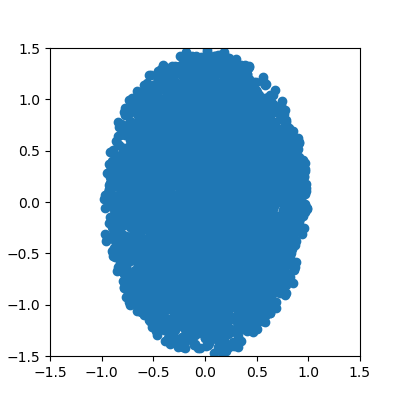

In [30]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.scatter(data_sphere[0], data_sphere[1])

<IPython.core.display.Javascript object>


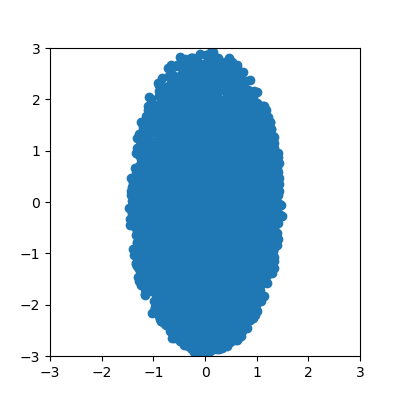

In [31]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(data_sphere[1], data_sphere[2])

In [32]:
# hacemos rotación alrededor de
theta = np.pi/8.0

rota = np.array([[1.,0.,0.],[0., np.cos(theta), -np.sin(theta)], [ 0., np.sin(theta), np.cos(theta)]]) 
print(rota)

[[ 1.          0.          0.        ]
 [ 0.          0.92387953 -0.38268343]
 [ 0.          0.38268343  0.92387953]]


In [33]:
new_data = np.dot(rota.T, data_sphere)

<IPython.core.display.Javascript object>


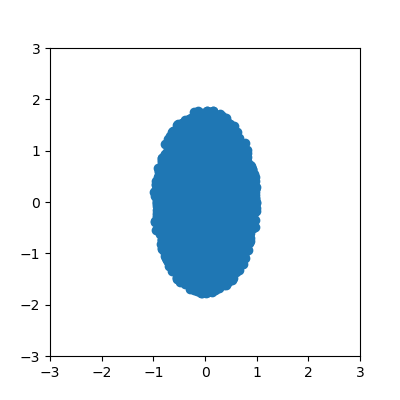

In [34]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(new_data[0], new_data[1])

<IPython.core.display.Javascript object>


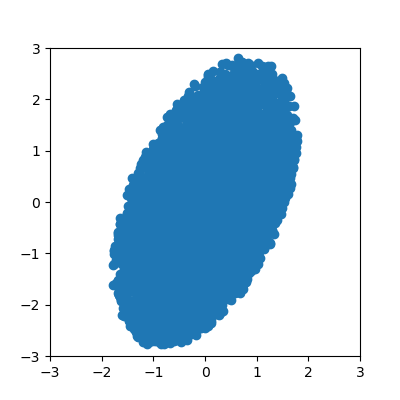

In [35]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(new_data[1], new_data[2])

In [37]:
print(new_data.shape)

(3, 5000)


# El tensor de inercia

Para un sistema de $N$ partículas con masa $m_{k}$ y posiciones $r_{k}$, el tensor de inercia se define como:

$$ \mathbf{I} = \sum_{k=1}^{N} m_{k}( (r_{k}\cdot r_{k})\mathbf{E}  - r_{k}\otimes r_{k})  $$

donde $ \mathbf{E}$ es el tensor unitario $e_{1}\otimes e_{1}+e_{2}\otimes e_{2}+e_{3}\otimes e_{3}  $

In [43]:
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

E=np.zeros((3,3))

for i in range(len(e1)):
    for j in range(len(e1)):
        E[i,j] = e1[i]*e1[j] + e2[i]*e2[j] + e3[i]*e3[j]

print(E)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
